<a href="https://colab.research.google.com/github/Pam2020/Inflation-Forecasting/blob/main/FDS_Project_Inflation_Forecasting_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FDS Project Inflation Forecasting**

Team:
1. Hema Kavuri
2. Sravya Pamula

## **Collecting the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The features considered in the project are the following:

Dependent Variable:

1. CPI (Monthly): https://fred.stlouisfed.org/series/CPALTT01USM657N


Independent Variables:

1. GDP (Quarterly): https://fred.stlouisfed.org/series/GDP

2. Interest Rates, Discount Rate for United States (Monthly): https://fred.stlouisfed.org/series/INTDSRUSM193N - Not seasonally adjusted.

3. Unemployment Rate (Monthly): https://fred.stlouisfed.org/series/UNRATE

4. Federal Debt: Total Public Debt as Percent of Gross Domestic Product(Quarterly): https://fred.stlouisfed.org/series/GFDEGDQ188S

5. Monthly and annual goods (BOP basis)exports and imports, 1992 - Present: https://fred.stlouisfed.org/series/USAXTIMVA01CXMLM,  https://fred.stlouisfed.org/series/USAXTEXVA01CXMLM


## **Importing all the data**

### Importing and Cleaning the dependent variable: CPI


In [ ]:
# Dependent variable
CPI = pd.read_csv('CPALTT01USM657N.csv')
CPI.head(10)

,DATE,CPALTT01USM657N
0,1960-01-01,-0.340136
1,1960-02-01,0.341297
2,1960-03-01,0.000000
3,1960-04-01,0.340136
4,1960-05-01,0.000000
5,1960-06-01,0.338983
6,1960-07-01,0.000000
7,1960-08-01,0.000000
8,1960-09-01,0.000000
9,1960-10-01,0.675676


Making the monthly data into quarterly data

In [ ]:
#CPI['CPALTT01USM657N'] = CPI['CPALTT01USM657N'].rolling(3).mean()
CPI = CPI.iloc[::3, :]
CPI

,DATE,CPALTT01USM657N
0,1960-01-01,-0.340136
3,1960-04-01,0.340136
6,1960-07-01,0.000000
9,1960-10-01,0.675676
12,1961-01-01,0.000000
...,...,...
738,2021-07-01,0.481052
741,2021-10-01,0.830812
744,2022-01-01,0.841457
747,2022-04-01,0.558253


In [ ]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 750
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             251 non-null    object 
 1   CPALTT01USM657N  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.rename(columns = {'CPALTT01USM657N': 'Consumer Price Index'}, inplace = True)
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 750
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  251 non-null    datetime64[ns]
 1   Consumer Price Index  251 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [ ]:
CPI.set_index('DATE', inplace = True)
CPI.dropna(inplace = True)

In [ ]:
CPI = CPI.loc['1966-01-01':'2021-07-01']
CPI

,Consumer Price Index
DATE,
1966-01-01,0.000000
1966-04-01,0.623053
1966-07-01,0.308642
1966-10-01,0.611621
1967-01-01,0.000000
...,...
2020-07-01,0.505824
2020-10-01,0.041494
2021-01-01,0.425378


As the time period included in CPI data is 1960-01-01 to 2022-07-01. We will make sure that the other data that we have is also in this time period.

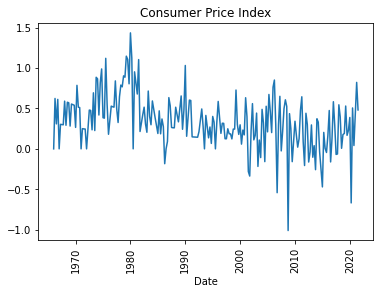

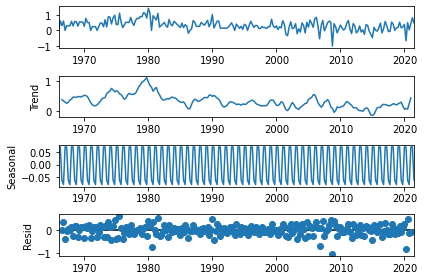

In [ ]:
plt.plot(CPI)
plt.xlabel('Date')
plt.title('Consumer Price Index')
plt.xticks(rotation=90)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(CPI, model='additive')
decomposition.plot()
plt.show()

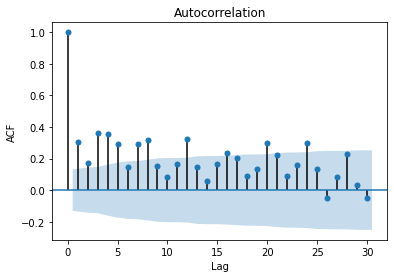

The test statistic is -2.2577672469199657 and p-value is 0.1859506951773619


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(CPI, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(CPI)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

The p-value is greater than 0.05, indicating that the CPI data is not stationary. We will check if the first difference is stationary.

In [ ]:
# taking a difference to make the data stationary
CPI_diff = CPI.diff().dropna()

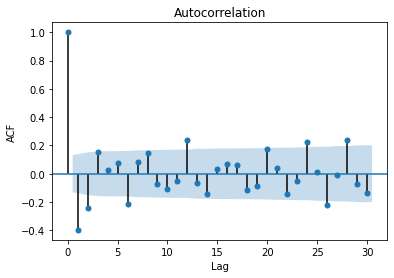

The test statistic is -6.459314905538433 and p-value is 1.4565838462505272e-08


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(CPI_diff, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(CPI_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

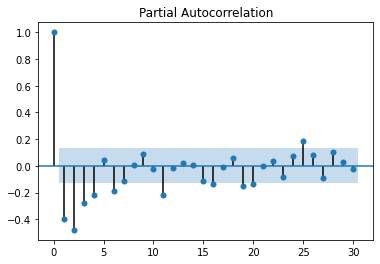

In [ ]:

sm.graphics.tsa.plot_pacf(CPI_diff, lags=30);

The p-value  is less than 0.05 showing that the data is stationary. The autocorrelation also shows no decline in autocorrelation with some seasonality.

## **Importing and Cleaning the independent variables:**

In this section, we will import and clean the independent variables data. After this, we will also check for their stationarity.

In [ ]:
# Independent Variables

GDP = pd.read_csv('/content/GDP.csv')
Int_rate = pd.read_csv('/content/Interest_Rate.csv')
Debt = pd.read_csv('/content/FederalDept.csv')
Unemp_rate = pd.read_csv('/content/Unemployment_Rate.csv')

## **GDP**

In [ ]:
# quarterly
GDP.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    302 non-null    object 
 1   GDP     302 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    302 non-null    datetime64[ns]
 1   GDP     302 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [ ]:
GDP.set_index('DATE', inplace = True)
GDP

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2021-04-01,23046.934
2021-07-01,23550.420
2021-10-01,24349.121


In [ ]:
GDP = GDP.loc['1966-01-01':'2021-07-01']

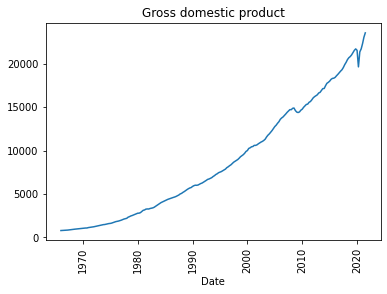

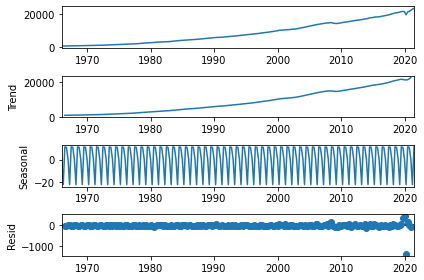

In [ ]:
plt.plot(GDP)
plt.xlabel('Date')
plt.title('Gross domestic product')
plt.xticks(rotation=90)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(GDP, model='additive')
decomposition.plot()
plt.show()

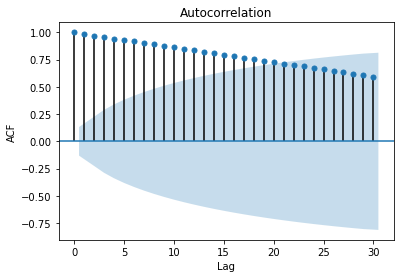

The test statistic is 4.531805471471085 and p-value is 1.0


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(GDP, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(GDP)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

Based on the p-value (1.0) and the rate of decline of the autocorrelation values, we can say that the GDP data is not stationary. We will make it stationary in order to forecast the GDP values. These forecasts will be used for forecasting the CPI (aka Inflation rate) using Multivariate time series analysis.

In [ ]:
# differencing two times as the first difference still does not give stationary data
GDP_diff = GDP.diff().dropna()
GDP_diff = GDP_diff.diff().dropna()

In [ ]:
# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(GDP_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

The test statistic is -7.590841149406074 and p-value is 2.5339523603555936e-11


Now the data is stationary as the p-value is below 0.05.

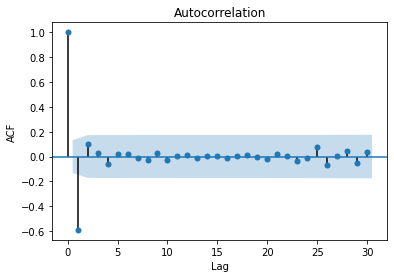

In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(GDP_diff, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

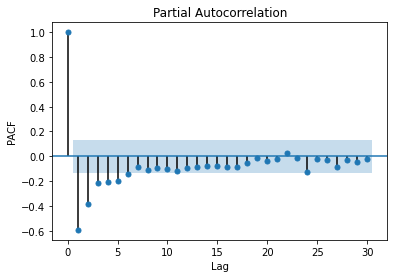

In [ ]:
sm.graphics.tsa.plot_pacf(GDP_diff, lags=30);
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

We see that the data is now stationary as the autocorrelation does not show a constant decline. I will use lag = 2 for time series modeling as it has significant autocorrelation.

## **Interest rate**

This data is monthly and we will have to convert this to quarterly data.

In [ ]:
Int_rate.head()

,DATE,INTDSRUSM193N
0,1950-01-01,1.5
1,1950-02-01,1.5
2,1950-03-01,1.5
3,1950-04-01,1.5
4,1950-05-01,1.5


In [ ]:
#Int_rate['INTDSRUSM193N'] = Int_rate['INTDSRUSM193N'].rolling(3).mean()
Int_rate = Int_rate.iloc[::3, :]
Int_rate

,DATE,INTDSRUSM193N
0,1950-01-01,1.50
3,1950-04-01,1.50
6,1950-07-01,1.50
9,1950-10-01,1.75
12,1951-01-01,1.75
...,...,...
846,2020-07-01,0.25
849,2020-10-01,0.25
852,2021-01-01,0.25
855,2021-04-01,0.25


In [ ]:
Int_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 858
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           287 non-null    object 
 1   INTDSRUSM193N  287 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [ ]:
Int_rate['DATE'] = pd.to_datetime(Int_rate['DATE'])
Int_rate.rename(columns = {'INTDSRUSM193N': 'Interest rate'}, inplace = True)
Int_rate = Int_rate[(Int_rate['DATE'] < '2022-07-01') & (Int_rate['DATE'] > '1960-01-01')]
#Int_rate = Int_rate[(Int_rate['DATE'] < '2022-07-01') & (Int_rate['DATE'] > '2000-01-01')]
Int_rate.set_index('DATE', inplace = True)
Int_rate

,Interest rate
DATE,
1960-04-01,4.00
1960-07-01,3.50
1960-10-01,3.00
1961-01-01,3.00
1961-04-01,3.00
...,...
2020-07-01,0.25
2020-10-01,0.25
2021-01-01,0.25


In [ ]:
Int_rate = Int_rate.loc['1966-01-01':'2021-07-01']
Int_rate

,Interest rate
DATE,
1966-01-01,4.50
1966-04-01,4.50
1966-07-01,4.50
1966-10-01,4.50
1967-01-01,4.50
...,...
2020-07-01,0.25
2020-10-01,0.25
2021-01-01,0.25


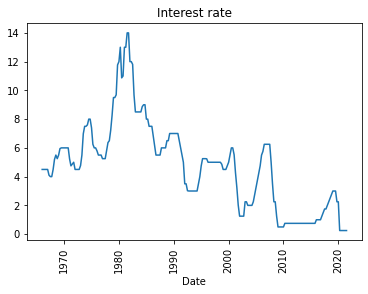

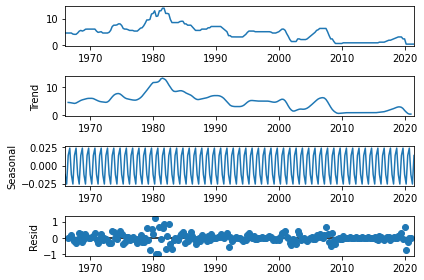

In [ ]:
plt.plot(Int_rate)
plt.xlabel('Date')
plt.title('Interest rate')
plt.xticks(rotation=90)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(Int_rate, model='additive')
decomposition.plot()
plt.show()

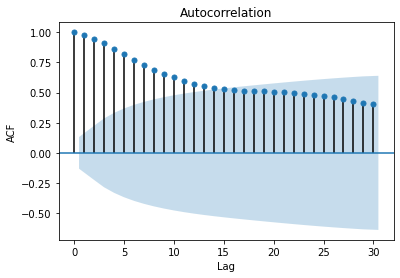

The test statistic is -2.167012037645756 and p-value is 0.2184352269678157


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(Int_rate, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(Int_rate)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

We do see a decline in the autocorrelation indicating that the interest rate is not stationary. This is also shown from the p-value from the ADF testing. The p-value is 0.36 which is less than 0.05.

In [ ]:
Int_rate_diff = Int_rate.diff().dropna()

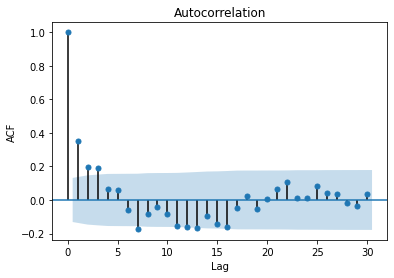

The test statistic is -6.079492261748637 and p-value is 1.1009363260246601e-07


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(Int_rate_diff, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(Int_rate_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

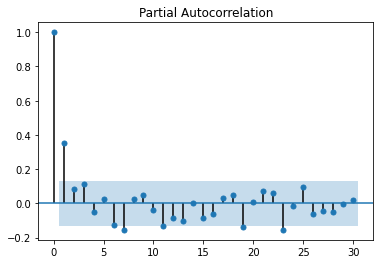

In [ ]:
sm.graphics.tsa.plot_pacf(Int_rate_diff, lags=30);

The p-value is less than 0.05 meaning that the data is now stationary. The autocorrelation function shows that the decline rate is less.

## **Federal Debt**

In [ ]:
Debt.head(10)

,DATE,GFDEGDQ188S
0,1966-01-01,40.33999
1,1966-04-01,39.26763
2,1966-07-01,39.62091
3,1966-10-01,39.51977
4,1967-01-01,39.20383
5,1967-04-01,38.03292
6,1967-07-01,38.82145
7,1967-10-01,39.10231
8,1968-01-01,38.42951
9,1968-04-01,36.96379


In [ ]:
Debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         226 non-null    object 
 1   GFDEGDQ188S  226 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
Debt['DATE'] = pd.to_datetime(Debt['DATE'])
Debt.rename(columns = {'GFDEGDQ188S': 'Federal Debt'}, inplace = True)
Debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          226 non-null    datetime64[ns]
 1   Federal Debt  226 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [ ]:
Debt.set_index('DATE', inplace = True)
Debt

,Federal Debt
DATE,
1966-01-01,40.33999
1966-04-01,39.26763
1966-07-01,39.62091
1966-10-01,39.51977
1967-01-01,39.20383
...,...
2021-04-01,123.78842
2021-07-01,120.71513
2021-10-01,121.63566


In [ ]:
Debt = Debt.loc['1966-01-01':'2021-07-01']
Debt

,Federal Debt
DATE,
1966-01-01,40.33999
1966-04-01,39.26763
1966-07-01,39.62091
1966-10-01,39.51977
1967-01-01,39.20383
...,...
2020-07-01,126.13450
2020-10-01,127.84231
2021-01-01,126.07672


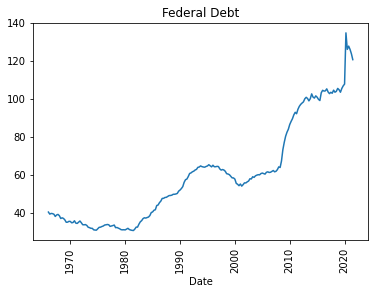

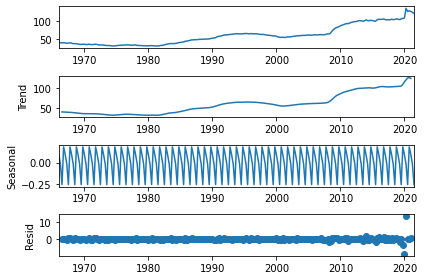

In [ ]:
plt.plot(Debt)
plt.xlabel('Date')
plt.title('Federal Debt')
plt.xticks(rotation=90)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(Debt, model='additive')
decomposition.plot()
plt.show()

The test statistic is 1.437757132175375 and p-value is 0.9972790945257752


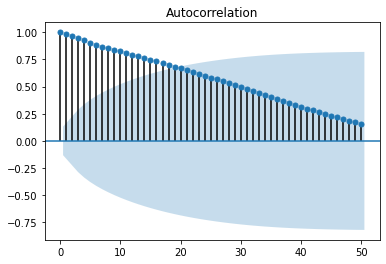

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Debt, lags=50);

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(Debt)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

We see that the p-value is greater than 0.05 indicating that the null hypothesis cannot be rejected and that the data is not-stationary.  

In [ ]:
# Taking two difference , because first difference says still the data is not Stationary
Debt_diff=Debt.diff().dropna()
Debt_diff=Debt_diff.diff().dropna()

The test statistic is -5.859135109296929 and p-value is 3.443359817018519e-07


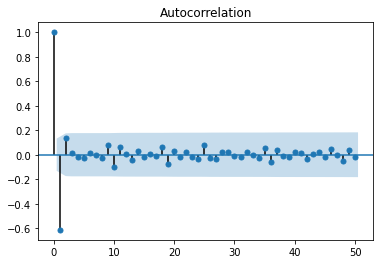

In [ ]:
sm.graphics.tsa.plot_acf(Debt_diff, lags=50);

stat_test = adfuller(Debt_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

P-value is greater than 0.05 and the ACF is not decaying after lag 2. So i will consider lag=2. Data is stationary.

## **Unemployment Rate**

In [ ]:
Unemp_rate.head(10)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [ ]:
#Unemp_rate['UNRATE'] = Unemp_rate['UNRATE'].rolling(3).mean()
Unemp_rate = Unemp_rate.iloc[::3, :]
Unemp_rate

,DATE,UNRATE
0,1948-01-01,3.4
3,1948-04-01,3.9
6,1948-07-01,3.6
9,1948-10-01,3.7
12,1949-01-01,4.3
...,...,...
882,2021-07-01,5.4
885,2021-10-01,4.6
888,2022-01-01,4.0
891,2022-04-01,3.6


In [ ]:
Unemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 894
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    299 non-null    object 
 1   UNRATE  299 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
Unemp_rate['DATE'] = pd.to_datetime(Unemp_rate['DATE'])

In [ ]:
Unemp_rate.rename(columns = {'UNRATE': 'Unemployee Rate'}, inplace = True)
Unemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 894
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             299 non-null    datetime64[ns]
 1   Unemployee Rate  299 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [ ]:
Unemp_rate.set_index('DATE', inplace = True)

Unemp_rate

,Unemployee Rate
DATE,
1948-01-01,3.4
1948-04-01,3.9
1948-07-01,3.6
1948-10-01,3.7
1949-01-01,4.3
...,...
2021-07-01,5.4
2021-10-01,4.6
2022-01-01,4.0


In [ ]:
Unemp_rate = Unemp_rate.loc['1966-01-01':'2021-07-01']
Unemp_rate

,Unemployee Rate
DATE,
1966-01-01,4.0
1966-04-01,3.8
1966-07-01,3.8
1966-10-01,3.7
1967-01-01,3.9
...,...
2020-07-01,10.2
2020-10-01,6.9
2021-01-01,6.4


In [ ]:
Unemp_rate.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


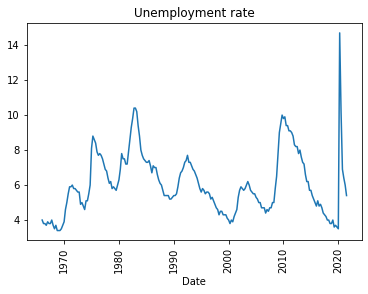

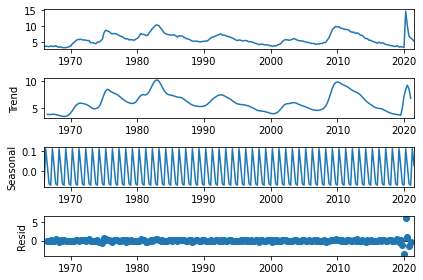

In [ ]:
plt.plot(Unemp_rate)
plt.xlabel('Date')
plt.title('Unemployment rate')
plt.xticks(rotation=90)
plt.show()

decomposition = seasonal_decompose(Unemp_rate, model='additive')
decomposition.plot()
plt.show()

The test statistic is -4.0278979081139035 and p-value is 0.0012712722241339817


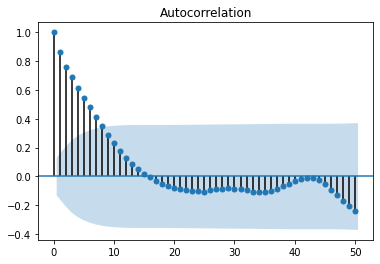

In [ ]:
sm.graphics.tsa.plot_acf(Unemp_rate, lags=50);

stat_test = adfuller(Unemp_rate)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

As the p-value is below 0.05, we have enough evidence to reject the null hypothesis and therefore conclude that the data is stationary.

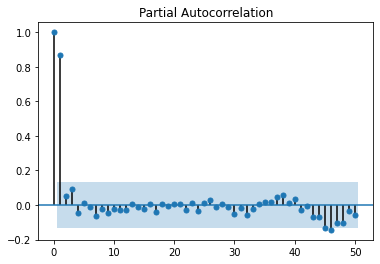

In [ ]:
sm.graphics.tsa.plot_pacf(Unemp_rate, lags=50);

## **Trade Imports Exports**

In [ ]:
Imports = pd.read_csv('/content/Imports_goods.csv')
Exports = pd.read_csv('/content/Exports_goods.csv')

In [ ]:
Imports.head()

,DATE,USAXTIMVA01CXMLM
0,1960-01-01,1.178000e+09
1,1960-02-01,1.334000e+09
2,1960-03-01,1.415000e+09
3,1960-04-01,1.300000e+09
4,1960-05-01,1.293000e+09


In [ ]:
Exports.head()

,DATE,USAXTEXVA01CXMLM
0,1960-01-01,1.567000e+09
1,1960-02-01,1.584000e+09
2,1960-03-01,1.755000e+09
3,1960-04-01,1.819000e+09
4,1960-05-01,1.816000e+09


In [ ]:
trade_imports_exports = pd.merge(Imports, Exports, on="DATE")
trade_imports_exports['Ratio_Imports_Exports'] = trade_imports_exports['USAXTIMVA01CXMLM']/trade_imports_exports['USAXTEXVA01CXMLM']
trade_imports_exports

,DATE,USAXTIMVA01CXMLM,USAXTEXVA01CXMLM,Ratio_Imports_Exports
0,1960-01-01,1.178000e+09,1.567000e+09,0.751755
1,1960-02-01,1.334000e+09,1.584000e+09,0.842172
2,1960-03-01,1.415000e+09,1.755000e+09,0.806268
3,1960-04-01,1.300000e+09,1.819000e+09,0.714678
4,1960-05-01,1.293000e+09,1.816000e+09,0.712004
...,...,...,...,...
746,2022-03-01,2.965180e+11,1.792980e+11,1.653772
747,2022-04-01,2.730970e+11,1.730060e+11,1.578541
748,2022-05-01,2.853400e+11,1.784210e+11,1.599251
749,2022-06-01,2.860970e+11,1.820970e+11,1.571124


In [ ]:
trade_imports_exports.drop(['USAXTIMVA01CXMLM', 'USAXTEXVA01CXMLM'], inplace  = True, axis = 1)

Convert monthly data to quarterly:

In [ ]:
#trade_imports_exports['Ratio_Imports_Exports'] = trade_imports_exports['Ratio_Imports_Exports'].rolling(3).mean()
trade_imports_exports = trade_imports_exports.iloc[::3, :]
trade_imports_exports

,DATE,Ratio_Imports_Exports
0,1960-01-01,0.751755
3,1960-04-01,0.714678
6,1960-07-01,0.696188
9,1960-10-01,0.678857
12,1961-01-01,0.698125
...,...,...
738,2021-07-01,1.650966
741,2021-10-01,1.535441
744,2022-01-01,1.682089
747,2022-04-01,1.578541


In [ ]:
trade_imports_exports['DATE'] = pd.to_datetime(trade_imports_exports['DATE'])
trade_imports_exports = trade_imports_exports[(trade_imports_exports['DATE'] < '2022-07-01') & (trade_imports_exports['DATE'] > '1960-01-01')]
trade_imports_exports.set_index('DATE', inplace = True)
trade_imports_exports

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ratio_Imports_Exports
DATE,
1960-04-01,0.714678
1960-07-01,0.696188
1960-10-01,0.678857
1961-01-01,0.698125
1961-04-01,0.623832
...,...
2021-04-01,1.577706
2021-07-01,1.650966
2021-10-01,1.535441


In [ ]:
trade_imports_exports = trade_imports_exports.loc['1966-01-01':'2021-07-01']
trade_imports_exports

,Ratio_Imports_Exports
DATE,
1966-01-01,0.861502
1966-04-01,0.799538
1966-07-01,0.856966
1966-10-01,0.847753
1967-01-01,0.898258
...,...
2020-07-01,1.768893
2020-10-01,1.650042
2021-01-01,1.602999


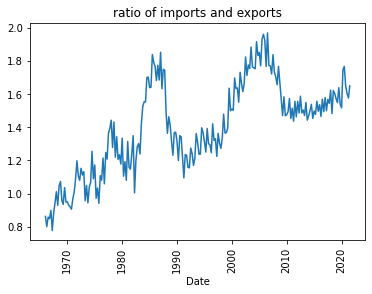

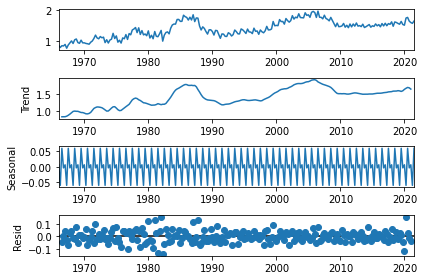

In [ ]:
plt.plot(trade_imports_exports)
plt.xlabel('Date')
plt.title('ratio of imports and exports')
plt.xticks(rotation=90)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(trade_imports_exports, model='additive')
decomposition.plot()
plt.show()

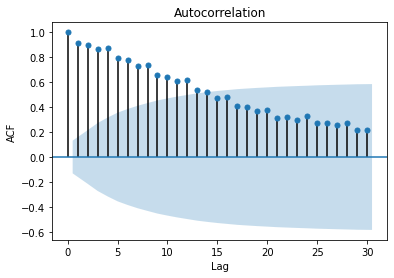

The test statistic is -2.3609355628343716 and p-value is 0.15306687395124874


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(trade_imports_exports, lags=30);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(trade_imports_exports)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

The p-value obtained from ADF testing is 0.2 which is greater than 0.05. Hence, we can say that the data is not stationary. The autocorrelation also shows a steady decline indicating non-stationarity. We will now take the first difference and see if that data is stationary.

In [ ]:
trade_imports_exports_diff = trade_imports_exports.diff().dropna()

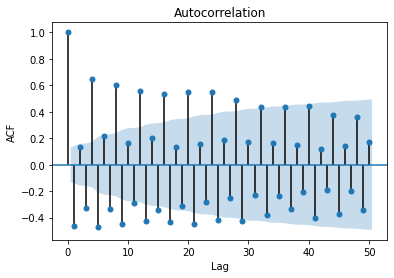

The test statistic is -3.7643371162256702 and p-value is 0.00329400982508977


In [ ]:
# ACF Testing
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(trade_imports_exports_diff, lags=50);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# ADF Testing

from statsmodels.tsa.stattools import adfuller

stat_test = adfuller(trade_imports_exports_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

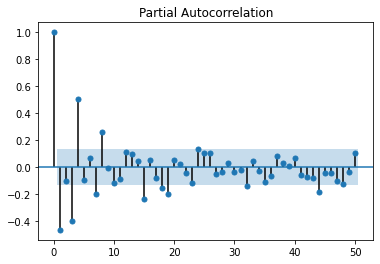

In [ ]:
sm.graphics.tsa.plot_pacf(trade_imports_exports_diff, lags=50);

We now see that the p-value is below 0.05 and the decline rate of the autocorrelation with lags is less indicating that the data is stationary.

## **Univariate time series forecasting**

We will now make individual forecasting for the above independent variables.

1. GDP: seasonally adjusted
2. Interest Rate: seasonaly adjusted
3. Federal Debt: seasonally adjusted
4. Unemployment Rate: seasonaly adjusted
5. Ratio of trade imports and exports: Not seasonally adjusted -  we will use SARIMAX here.

## **GDP forecasting**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
GDP_train_len = int(len(GDP)*0.8)
GDP_train = GDP[:GDP_train_len]
GDP_test = GDP[GDP_train_len:]

In [ ]:
print('Number of training samples:', len(GDP_train))
print('Number of test samples:', len(GDP_test))

Number of training samples: 178
Number of test samples: 45


As we have seen earlier, we have will use lag = 2 as it corresponds to significant autocorrelation and take the second difference to make the data stationary.

ARIMA - Integrated

In [ ]:
arima_model = ARIMA(GDP_train, order=(4, 2, 1))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
start = len(GDP_train)
end = len(GDP_train) + len(GDP_test) - 1

In [ ]:
arima_predict = arima_result.predict(start, end)
arima_predict.index = GDP_test.index

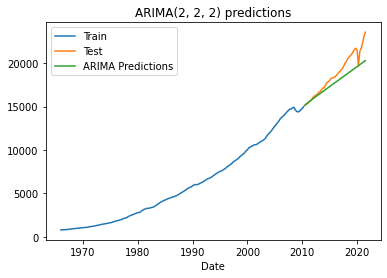

In [ ]:
plt.plot(GDP_train, label='Train')
plt.plot(GDP_test, label='Test')
plt.plot(arima_predict, label='ARIMA Predictions')
plt.title('ARIMA(2, 2, 2) predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
arima_pred_diff = arima_predict.diff().dropna()
arima_pred_diff = arima_pred_diff.diff().dropna()

In [ ]:
GDP_diff_train_len = int(len(GDP_diff)*0.8)
GDP_diff_train = GDP_diff[:GDP_diff_train_len]
GDP_diff_test = GDP_diff[GDP_diff_train_len:]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_GDP = mean_absolute_error(GDP_diff_test.iloc[2:], arima_pred_diff)
mse_GDP = mean_squared_error(GDP_diff_test.iloc[2:], arima_pred_diff)
rmse_GDP = np.sqrt(mean_squared_error(GDP_diff_test.iloc[2:], arima_pred_diff))

In [ ]:
arima_GDP_perf = {'mae_GDP':mae_GDP,
            'mse_GDP':mse_GDP,
            'rmse_GDP':rmse_GDP}
arima_GDP_perf = pd.DataFrame([arima_GDP_perf])
arima_GDP_perf

,mae_GDP,mse_GDP,rmse_GDP
0,248.865939,435228.469896,659.718478


In [ ]:
arima_model = ARIMA(GDP, order=(4, 2, 1))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
forecast_index_gdp = pd.date_range(GDP_test.index[-1], periods=90)
arima_forecast_gdp = arima_result.forecast(steps=90)
arima_forecast_gdp.index = forecast_index_gdp

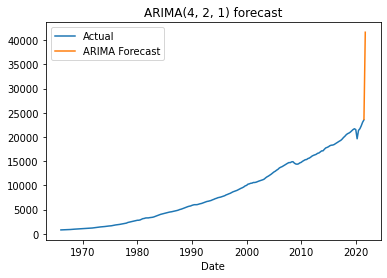

In [ ]:
plt.plot(GDP, label='Actual')
plt.plot(arima_forecast_gdp, label='ARIMA Forecast')
plt.title('ARIMA(4, 2, 1) forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
forecast_dict = {}
forecast_dict['index'] = arima_forecast_gdp.index
forecast_dict['GDP'] = arima_forecast_gdp.values

In [ ]:
forecast_dict

{'index': DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
                '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
                '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
                '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
                '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
                '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
                '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
                '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
                '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
                '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
                '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
                '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
                '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
                '2021-08-22', '2021-08-23', '2021-08-24

## **Federal debt forecasting**

In [ ]:
Debt_train_len = int(len(Debt)*0.8)
Debt_train = Debt[:Debt_train_len]
Debt_test = Debt[Debt_train_len:]

In [ ]:
print('Number of training samples:', len(Debt_train))
print('Number of test samples:', len(Debt_test))

Number of training samples: 178
Number of test samples: 45


Here I am using second difference as seen earlier which makes data stationary and using lag=2 which is significant.

In [ ]:
arima_model = ARIMA(Debt_train, order=(2, 2, 2))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
start = len(Debt_train)
end = len(Debt_train) + len(Debt_test) - 1

In [ ]:
arima_predict = arima_result.predict(start, end)
arima_predict.index = Debt_test.index

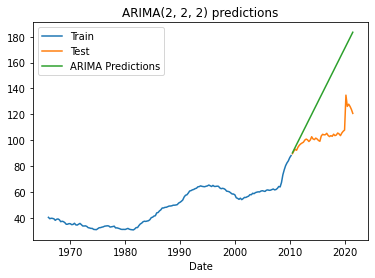

In [ ]:
plt.plot(Debt_train, label='Train')
plt.plot(Debt_test, label='Test')
plt.plot(arima_predict, label='ARIMA Predictions')
plt.title('ARIMA(2, 2, 2) predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
Debt_diff_train_len = int(len(Debt_diff)*0.8)
Debt_diff_train = Debt_diff[:Debt_diff_train_len]
Debt_diff_test = Debt_diff[Debt_diff_train_len:]

In [ ]:
arima_pred_diff = arima_predict.diff().dropna()
arima_pred_diff = arima_pred_diff.diff().dropna()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
mae_debt = mean_absolute_error(Debt_diff_test.iloc[2:], arima_pred_diff)
mse_debt = mean_squared_error(Debt_diff_test.iloc[2:], arima_pred_diff)
rmse_debt = np.sqrt(mean_squared_error(Debt_diff_test.iloc[2:], arima_pred_diff))

In [ ]:
arima_debt_perf = {'mae_debt':mae_debt,
            'mse_debt':mse_debt,
            'rmse_debt':rmse_debt}
arima_debt_perf = pd.DataFrame([arima_debt_perf])
arima_debt_perf

,mae_debt,mse_debt,rmse_debt
0,3.107505,51.327109,7.164294


In [ ]:
arima_model = ARIMA(Debt, order=(2, 2, 2))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

In [ ]:
forecast_index = pd.date_range(Debt_test.index[-1], periods=90)
arima_forecast = arima_result.forecast(steps=90)
arima_forecast.index = forecast_index

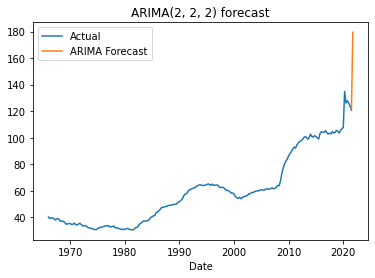

In [ ]:
plt.plot(Debt, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA(2, 2, 2) forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
forecast_dict['Federal debt'] = arima_forecast.values

## **Unemployment rate forecasting**

In [ ]:
Unemp_train_len = int(len(Unemp_rate)*0.8)
Unemp_train = Unemp_rate[:Unemp_train_len]
Unemp_test = Unemp_rate[Unemp_train_len:]

In [ ]:
start = len(Unemp_train)
end = len(Unemp_train) + len(Unemp_test) - 1

In [ ]:
ma_model = ARIMA(Unemp_train, order=(0, 0, 7))
ma_results = ma_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
ma_pred = ma_results.predict(start, end)
ma_pred_df = pd.DataFrame(ma_pred)
ma_pred_df.index = Unemp_test.index

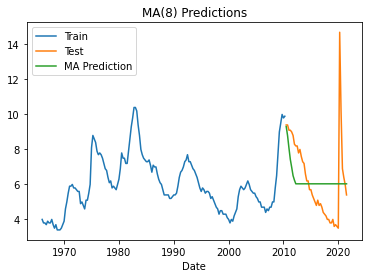

In [ ]:
plt.title('MA(8) Predictions')
plt.plot(Unemp_train, label='Train')
plt.plot(Unemp_test, label='Test')
plt.plot(ma_pred_df, label='MA Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
mae_ma = mean_absolute_error(Unemp_test, ma_pred_df)
mse_ma = mean_squared_error(Unemp_test, ma_pred_df)
rmse_ma = np.sqrt(mean_squared_error(Unemp_test, ma_pred_df))

In [ ]:
ma_perf = {'mae_ma': mae_ma,
        'mse_ma': mse_ma,
        'rmse_ma': rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,1.600476,4.40534,2.09889


In [ ]:
forecast_index = pd.date_range(Unemp_test.index[-1], periods=90)

In [ ]:
ma_model = ARIMA(Unemp_rate, order=(0, 0, 7))
ma_results = ma_model.fit()
ma_forecast = ma_results.forecast(steps=90)
ma_forecast.index = forecast_index

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


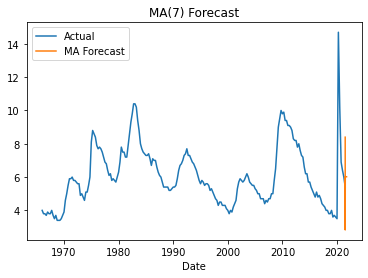

In [ ]:
plt.title('MA(7) Forecast')
plt.plot(Unemp_rate, label='Actual')
plt.plot(ma_forecast, label='MA Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
forecast_dict['Unemp Rate'] = ma_forecast.values

## **Interest rate forecasting**


In [ ]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
Int_rate_train_len = int(len(Int_rate)*0.8)
Int_rate_train = Int_rate[:Int_rate_train_len]
Int_rate_test = Int_rate[Int_rate_train_len:]

In [ ]:

print('Number of training samples:', len(Int_rate_train))
print('Number of test samples:', len(Int_rate_test))

Number of training samples: 178
Number of test samples: 45


In [ ]:
arima_model = ARIMA(Int_rate_train, order=(6, 1, 6))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

In [ ]:
start = len(Int_rate_train)
end = len(Int_rate_train) + len(Int_rate_test) - 1

In [ ]:
arima_predict = arima_result.predict(start, end)
arima_predict.index = Int_rate_test.index

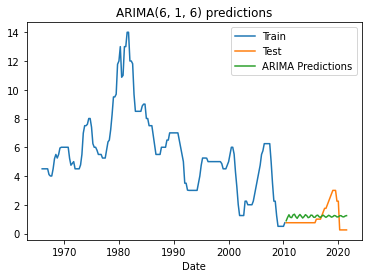

In [ ]:
plt.plot(Int_rate_train, label='Train')
plt.plot(Int_rate_test, label='Test')
plt.plot(arima_predict, label='ARIMA Predictions')
plt.title('ARIMA(6, 1, 6) predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
arima_pred_diff = arima_predict.diff().dropna()
arima_pred_diff.shape

(44,)

In [ ]:
Int_rate_diff_train_len = int(len(Int_rate_diff)*0.8)
Int_rate_diff_train = Int_rate_diff[:Int_rate_diff_train_len]
Int_rate_diff_test = Int_rate_diff[Int_rate_diff_train_len:]
Int_rate_diff_test.shape

(45, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_int_rate = mean_absolute_error(Int_rate_diff_test.iloc[1:], arima_pred_diff)
mse_int_rate = mean_squared_error(Int_rate_diff_test.iloc[1:], arima_pred_diff)
rmse_int_rate = np.sqrt(mean_squared_error(Int_rate_diff_test.iloc[1:], arima_pred_diff))

In [ ]:
arima_int_rate_perf = {'mae_int_rate':mae_int_rate,
            'mse_int_rate':mse_int_rate,
            'rmse_int_rate':rmse_int_rate}
arima_int_rate_perf = pd.DataFrame([arima_int_rate_perf])
arima_int_rate_perf

,mae_int_rate,mse_int_rate,rmse_int_rate
0,0.215012,0.094933,0.308112


In [ ]:
arima_model = ARIMA(Int_rate, order=(6, 1, 6))
arima_result = arima_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

In [ ]:
forecast_index_int_rate = pd.date_range(Int_rate_test.index[-1], periods=90)
arima_forecast_int_rate = arima_result.forecast(steps=90)
arima_forecast_int_rate.index = forecast_index_int_rate

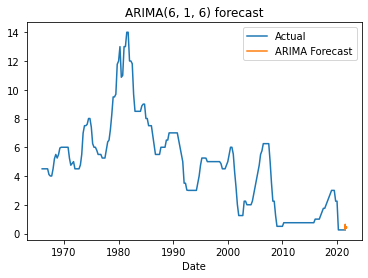

In [ ]:
plt.plot(Int_rate, label='Actual')
plt.plot(arima_forecast_int_rate, label='ARIMA Forecast')
plt.title('ARIMA(6, 1, 6) forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
forecast_dict['Interest rate'] = ma_forecast.values

## **Ratio of imports and exports forecasting**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
trade_ratio_diff_train_len = int(len(trade_imports_exports_diff)*0.8)
trade_ratio_diff_train = trade_imports_exports_diff[:trade_ratio_diff_train_len]
trade_ratio_diff_test = trade_imports_exports_diff[trade_ratio_diff_train_len:]

In [ ]:
trade_ratio_train_len = int(len(trade_imports_exports)*0.8)
trade_ratio__train = trade_imports_exports[:trade_ratio_train_len]
trade_ratio__test = trade_imports_exports[trade_ratio_train_len:]

In [ ]:
print('Number of training samples:', len(trade_ratio__train))
print('Number of test samples:', len(trade_ratio__test))

Number of training samples: 178
Number of test samples: 45


In [ ]:
sarima_model = SARIMAX(trade_ratio__train, order=(4, 1, 4), seasonal_order=(4, 1, 4, 12))
sarima_result = sarima_model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
start = len(trade_ratio__train)
end = len(trade_ratio__train) + len(trade_ratio__test) - 1

In [ ]:
sarima_pred = sarima_result.predict(start, end)
sarima_pred.index = trade_ratio__test.index

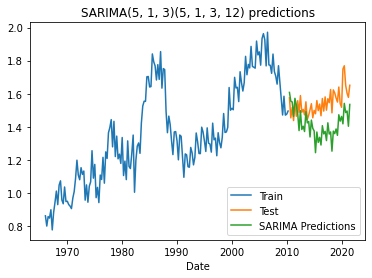

In [ ]:
plt.plot(trade_ratio__train, label='Train')
plt.plot(trade_ratio__test, label='Test')
plt.plot(sarima_pred, label='SARIMA Predictions')
plt.title('SARIMA(5, 1, 3)(5, 1, 3, 12) predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
sarima_pred_diff = sarima_pred.diff().dropna()

In [ ]:
mae_sarima = mean_absolute_error(trade_ratio_diff_test.iloc[1:], sarima_pred_diff)
mse_sarima = mean_squared_error(trade_ratio_diff_test.iloc[1:], sarima_pred_diff)
rmse_sarima = np.sqrt(mean_squared_error(trade_ratio_diff_test.iloc[1:], sarima_pred_diff))

In [ ]:
sarima_perf = {'mae_sarima':mae_sarima,
            'mse_sarima':mse_sarima,
            'rmse_sarima':rmse_sarima}
sarima_perf = pd.DataFrame([sarima_perf])
sarima_perf

,mae_sarima,mse_sarima,rmse_sarima
0,0.049299,0.004707,0.068607


In [ ]:
sarima_model = SARIMAX(trade_imports_exports, order=(4, 1, 4), seasonal_order=(4, 1, 4, 12))
sarima_result = sarima_model.fit(disp=0)
sarima_forecast = sarima_result.forecast(steps=90)
forecast_index_trade = pd.date_range(trade_ratio__test.index[-1], periods=90)
sarima_forecast.index = forecast_index_trade

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


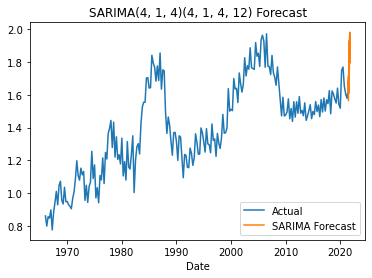

In [ ]:
plt.plot(trade_imports_exports, label='Actual')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA(4, 1, 4)(4, 1, 4, 12) Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
forecast_dict['Import export ratio'] = sarima_forecast.values

## **Multivariate times series forecasting for CPI (inflation rate)**

- Endogeneous variable: CPI aka inflation rate.
- Exogeneous variables: These variables are used in the regression analysis to find the endogeneous variable.

In [ ]:
exogeneous_forecast = pd.DataFrame(forecast_dict, index=forecast_dict['index'])

In [ ]:
exogeneous_forecast

,index,GDP,Federal debt,Unemp Rate,Interest rate,Import export ratio
2021-07-01,2021-07-01,23684.915827,121.465314,8.396645,8.396645,1.564804
2021-07-02,2021-07-02,23852.803410,121.531585,5.760284,5.760284,1.621535
2021-07-03,2021-07-03,24007.364661,122.039351,2.825932,2.825932,1.623489
2021-07-04,2021-07-04,24191.702916,122.559102,4.202715,4.202715,1.689895
2021-07-05,2021-07-05,24404.552215,123.155752,5.219370,5.219370,1.607172
...,...,...,...,...,...,...
2021-09-24,2021-09-24,40849.483717,176.805998,6.020668,6.020668,1.919176
2021-09-25,2021-09-25,41052.431391,177.469565,6.020668,6.020668,1.873436
2021-09-26,2021-09-26,41255.379066,178.133133,6.020668,6.020668,1.980814
2021-09-27,2021-09-27,41458.326740,178.796700,6.020668,6.020668,1.929639


In [ ]:
exogeneous_forecast.drop('index', inplace = True, axis = 1)
exogeneous_forecast

,GDP,Federal debt,Unemp Rate,Interest rate,Import export ratio
2021-07-01,23684.915827,121.465314,8.396645,8.396645,1.564804
2021-07-02,23852.803410,121.531585,5.760284,5.760284,1.621535
2021-07-03,24007.364661,122.039351,2.825932,2.825932,1.623489
2021-07-04,24191.702916,122.559102,4.202715,4.202715,1.689895
2021-07-05,24404.552215,123.155752,5.219370,5.219370,1.607172
...,...,...,...,...,...
2021-09-24,40849.483717,176.805998,6.020668,6.020668,1.919176
2021-09-25,41052.431391,177.469565,6.020668,6.020668,1.873436
2021-09-26,41255.379066,178.133133,6.020668,6.020668,1.980814
2021-09-27,41458.326740,178.796700,6.020668,6.020668,1.929639


In [ ]:
CPI

,Consumer Price Index
DATE,
1966-01-01,0.000000
1966-04-01,0.623053
1966-07-01,0.308642
1966-10-01,0.611621
1967-01-01,0.000000
...,...
2020-07-01,0.505824
2020-10-01,0.041494
2021-01-01,0.425378


In [ ]:
CPI['GDP'] = GDP
CPI['Interest rate'] = Int_rate
CPI['Federal Debt'] = Debt
CPI['Unemployment rate'] = Unemp_rate
CPI['Ratio of imports and exports'] = trade_imports_exports
CPI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Consumer Price Index,GDP,Interest rate,Federal Debt,Unemployment rate,Ratio of imports and exports
DATE,,,,,,
1966-01-01,0.000000,795.734,4.50,40.33999,4.0,0.861502
1966-04-01,0.623053,804.981,4.50,39.26763,3.8,0.799538
1966-07-01,0.308642,819.638,4.50,39.62091,3.8,0.856966
1966-10-01,0.611621,833.302,4.50,39.51977,3.7,0.847753
1967-01-01,0.000000,844.170,4.50,39.20383,3.9,0.898258
...,...,...,...,...,...,...
2020-07-01,0.505824,21362.428,0.25,126.13450,10.2,1.768893
2020-10-01,0.041494,21704.706,0.25,127.84231,6.9,1.650042
2021-01-01,0.425378,22313.850,0.25,126.07672,6.4,1.602999


In [ ]:
tot_df = CPI.dropna()
tot_df

,Consumer Price Index,GDP,Interest rate,Federal Debt,Unemployment rate,Ratio of imports and exports
DATE,,,,,,
1966-01-01,0.000000,795.734,4.50,40.33999,4.0,0.861502
1966-04-01,0.623053,804.981,4.50,39.26763,3.8,0.799538
1966-07-01,0.308642,819.638,4.50,39.62091,3.8,0.856966
1966-10-01,0.611621,833.302,4.50,39.51977,3.7,0.847753
1967-01-01,0.000000,844.170,4.50,39.20383,3.9,0.898258
...,...,...,...,...,...,...
2020-07-01,0.505824,21362.428,0.25,126.13450,10.2,1.768893
2020-10-01,0.041494,21704.706,0.25,127.84231,6.9,1.650042
2021-01-01,0.425378,22313.850,0.25,126.07672,6.4,1.602999


In [ ]:
filtered_df = tot_df[['Interest rate', 'GDP', 'Federal Debt', 'Unemployment rate', 'Ratio of imports and exports']]
X = filtered_df
y = tot_df['Consumer Price Index']

In [ ]:
train_len = int(len(tot_df) * 0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

In [ ]:
sarimax = SARIMAX(y_train, exog=X_train, order=(3, 1, 2), seasonal_order=(3,1,2,12))
sarimax_results = sarimax.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
start = len(X_train)
end = len(X_train) + len(X_test) -1

In [ ]:
sarimax_pred = sarimax_results.predict(start, end, exog=X_test)
sarimax_pred.index = X_test.index

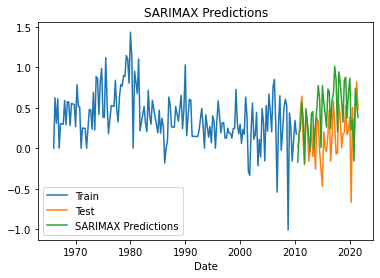

In [ ]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(sarimax_pred, label='SARIMAX Predictions')
plt.title('SARIMAX Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
mae_Sarimax = mean_absolute_error(y_test, arimax_pred)
mse_Sarimax = mean_squared_error(y_test, arimax_pred)
rmse_Sarimax = np.sqrt(mean_squared_error(y_test, arimax_pred))

In [ ]:
arimax_perf = {'mae_sarimax':mae_Sarimax,
               'mse_sarimax':mse_Sarimax,
              'rmse_sarimax':rmse_Sarimax}
arimax_perf = pd.DataFrame([arimax_perf])
arimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,0.347584,0.189864,0.435734


In [ ]:
sarimax_model = SARIMAX(y, order=(3, 1, 2), seasonal_order=(3,1,2,12))
sarimax_result = sarimax_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization faile

In [ ]:
sarimax_forecast = sarimax_result.forecast(steps=90, exog=exogeneous_forecast)
forecast_index = pd.date_range(y.index[-1], periods=90)
sarimax_forecast.index = forecast_index

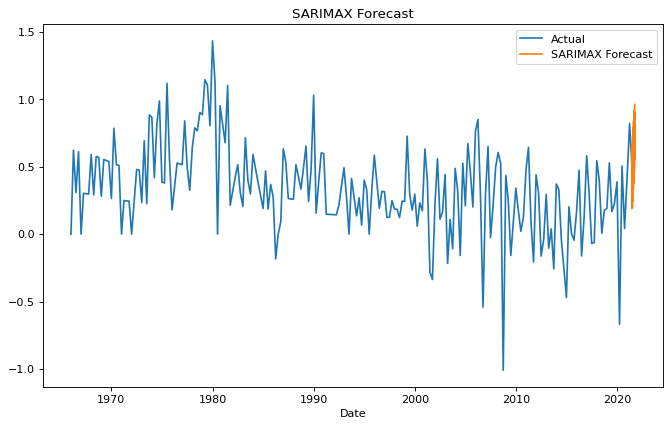

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.plot(CPI['Consumer Price Index'], label='Actual')
plt.plot(arimax_forecast, label='SARIMAX Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
arimax_forecast

2021-07-01    0.290939
2021-07-02    0.077129
2021-07-03    0.470146
2021-07-04    0.396929
2021-07-05    0.403563
                ...   
2021-10-04    0.258566
2021-10-05    0.258566
2021-10-06    0.258566
2021-10-07    0.258566
2021-10-08    0.258566
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

## **Results**

1. Predicted interest rates closely match the actual from the test data.

2. Forecasted values show an increase in inflation rate in the near furture and aligns with the existing trend.

3. Better investment decisions can be made by companies and individuals based on the inlfation forecasts.

